<h1 style="color: red;">🏠 EDA on Dataset of E-commerce sales</h1>

- #### In this notebook, we do an advanced EDA(Expolatory Data Analysis) on provided dataset and will explor given below queries.
- The monthly sales trends.
- Top-performing products and categories.
- Customer demographics analysis (age, region, etc.).
- Recommendations for improving sales.

<h2 style="color: blue;">📚 Step 1: Importing Necessary Libraries</h2>

- #### Here, we import essential libraries for data handling, visualization, and machine learning modeling.

In [3]:

# Importing libraries for data manipulation, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Setting visualization style
sns.set_style('whitegrid')

<h2 style="color: blue;">📂 Step 2: Loading and Exploring Dataset</h2>

- #### We load the data and display its structure to understand the features available. This helps us identify any data cleaning steps required.

In [4]:

# Load the dataset
df = pd.read_csv("ecommerce_professional_dataset.csv")

# Display first few rows of data
df.head()


,OrderDate,Product,Region,Age,Revenue,Quantity,CustomerID,Category
0,2023-01-01 00:00:00,Phone,South,18,3839,3,1099,Electronics
1,2023-01-01 01:00:00,Tablet,East,18,2119,7,1077,Electronics
2,2023-01-01 02:00:00,Tablet,South,54,2587,1,1009,Electronics
3,2023-01-01 03:00:00,Mouse,East,38,2320,10,1038,Accessories
4,2023-01-01 04:00:00,Smartwatch,West,32,953,3,1075,Wearables


In [5]:
df.shape

(10000, 8)

<h2 style="color: blue;">🧼 Step 3: Data Cleaning</h2>
    <h3 style="color: green;">Handling missing data</h3>

In [6]:
df.isnull().sum()

OrderDate     0
Product       0
Region        0
Age           0
Revenue       0
Quantity      0
CustomerID    0
Category      0
dtype: int64

- #### As there is no missing values in the dataset so no need to do this step further.

<h3 style="color: green;">Removing Duplicate:</h3>

In [9]:
df.duplicated().sum()

0

- #### As there is no duplicate values in the dataset so no need to do this step further.

<h3 style="color: green;">Feature Engineering:</h3>

In [10]:
df.head(5)

,OrderDate,Product,Region,Age,Revenue,Quantity,CustomerID,Category
0,2023-01-01 00:00:00,Phone,South,18,3839,3,1099,Electronics
1,2023-01-01 01:00:00,Tablet,East,18,2119,7,1077,Electronics
2,2023-01-01 02:00:00,Tablet,South,54,2587,1,1009,Electronics
3,2023-01-01 03:00:00,Mouse,East,38,2320,10,1038,Accessories
4,2023-01-01 04:00:00,Smartwatch,West,32,953,3,1075,Wearables


- #### Adding features that will be required in future:
- As OrderDate column having values with date and time in it so we explor this column into month and year so for further processing

In [13]:
# Convert OrderDate to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.head(2)

,OrderDate,Product,Region,Age,Revenue,Quantity,CustomerID,Category
0,2023-01-01 00:00:00,Phone,South,18,3839,3,1099,Electronics
1,2023-01-01 01:00:00,Tablet,East,18,2119,7,1077,Electronics


In [14]:
# Create new columns for analysis
df['Month'] = df['OrderDate'].dt.month
df['Year'] = df['OrderDate'].dt.year

In [15]:
# Check transformed dataset
print("\nTransformed dataset with new columns:")
df.head()


Transformed dataset with new columns:


,OrderDate,Product,Region,Age,Revenue,Quantity,CustomerID,Category,Month,Year
0,2023-01-01 00:00:00,Phone,South,18,3839,3,1099,Electronics,1,2023
1,2023-01-01 01:00:00,Tablet,East,18,2119,7,1077,Electronics,1,2023
2,2023-01-01 02:00:00,Tablet,South,54,2587,1,1009,Electronics,1,2023
3,2023-01-01 03:00:00,Mouse,East,38,2320,10,1038,Accessories,1,2023
4,2023-01-01 04:00:00,Smartwatch,West,32,953,3,1075,Wearables,1,2023


---

<h2 style="color: blue;">🔄 Step 4:Exploratory Analysis</h3>
<h3 style="color: green;"> In this step we will perform Advance Exploratory Data Analysis</h4>



<h3 style="color: green;">1. The monthly sales trends:</h3>

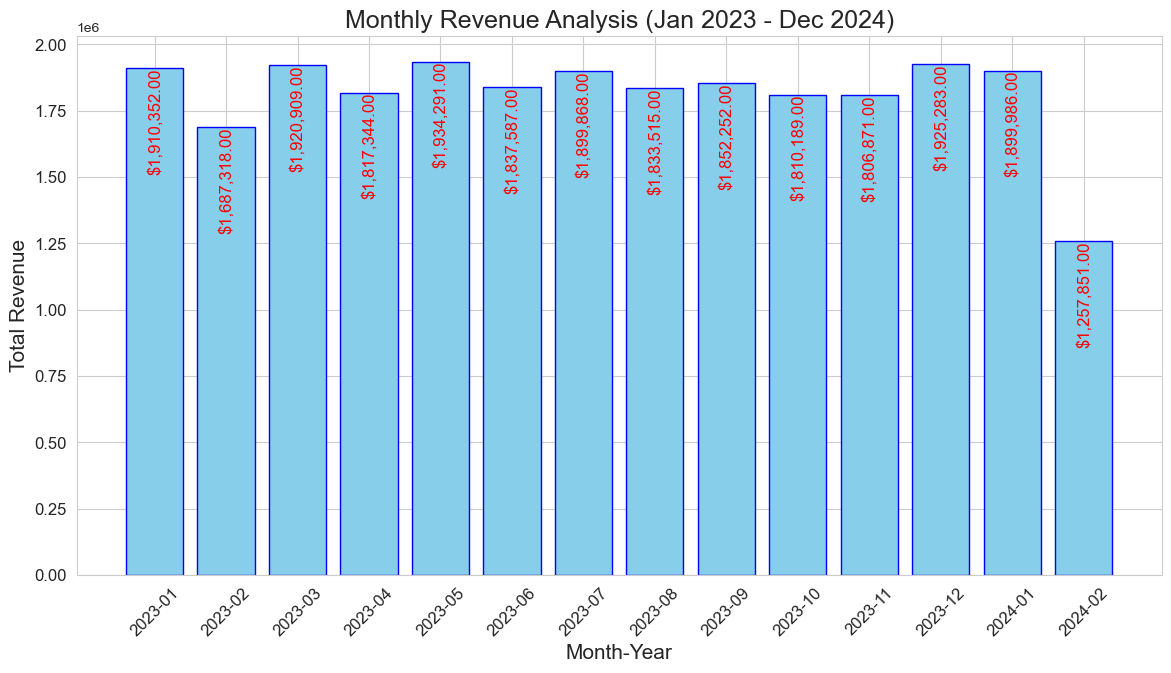

In [37]:
## Monthly Revenue Analysis
df["Month-Year"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2)
monthly_revenue = df.groupby("Month-Year")["Revenue"].sum().reset_index()

# Sort and convert "Month-Year" to datetime for correct ordering
monthly_revenue["Month-Year"] = pd.to_datetime(monthly_revenue["Month-Year"], format="%Y-%m").dt.strftime("%Y-%m")

plt.figure(figsize=(14, 7))
plt.bar(monthly_revenue["Month-Year"], monthly_revenue["Revenue"], color='skyblue', edgecolor='blue')

# Titles and labels
plt.title("Monthly Revenue Analysis (Jan 2023 - Dec 2024)", fontsize=18)
plt.xlabel("Month-Year", fontsize=15)
plt.ylabel("Total Revenue", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display revenue values on top of bars
for i, v in enumerate(monthly_revenue["Revenue"]):
    plt.text(i, v, f'${v:,.2f}', fontsize=12, rotation=90, ha='center', color='red', verticalalignment='top')

plt.show()

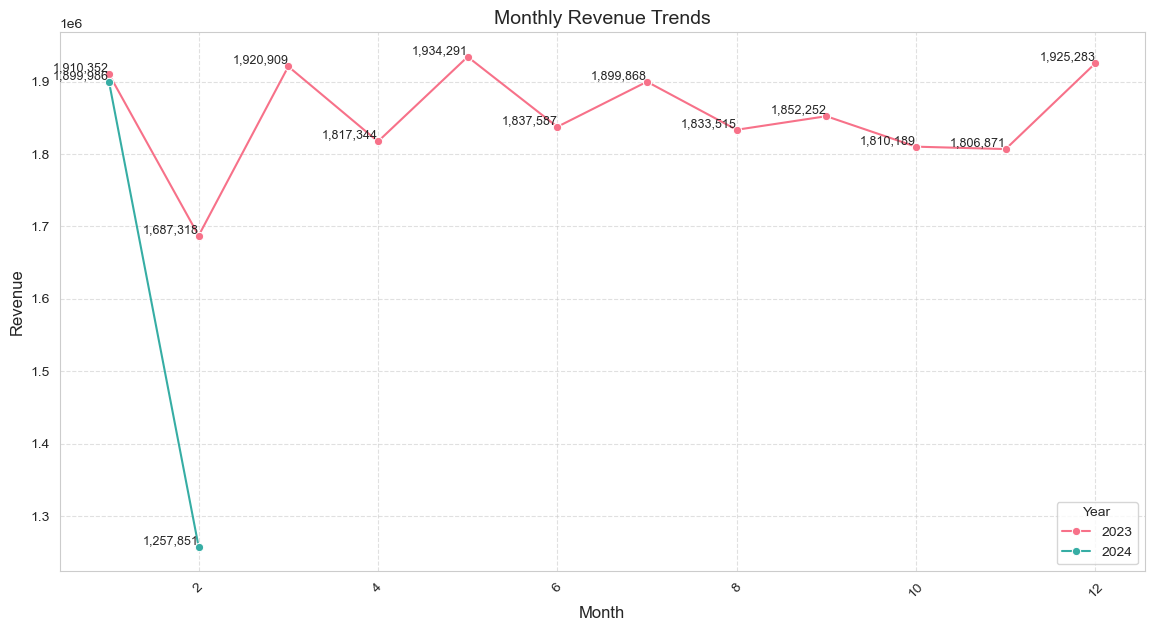

In [36]:
## Monthly Sales Trends
monthly_trends = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index().sort_values(['Year', 'Month'])

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(monthly_trends['Year'].unique()))

ax = sns.lineplot(data=monthly_trends, x='Month', y='Revenue', hue='Year', marker='o', palette=palette)

# Add labels to data points
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:,.0f}', ha='right', va='bottom', fontsize=9)

plt.title('Monthly Revenue Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend(title='Year', fontsize=10, loc='lower right')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<h3 style="color: green;">2. Top-performing products and categories:</h3>

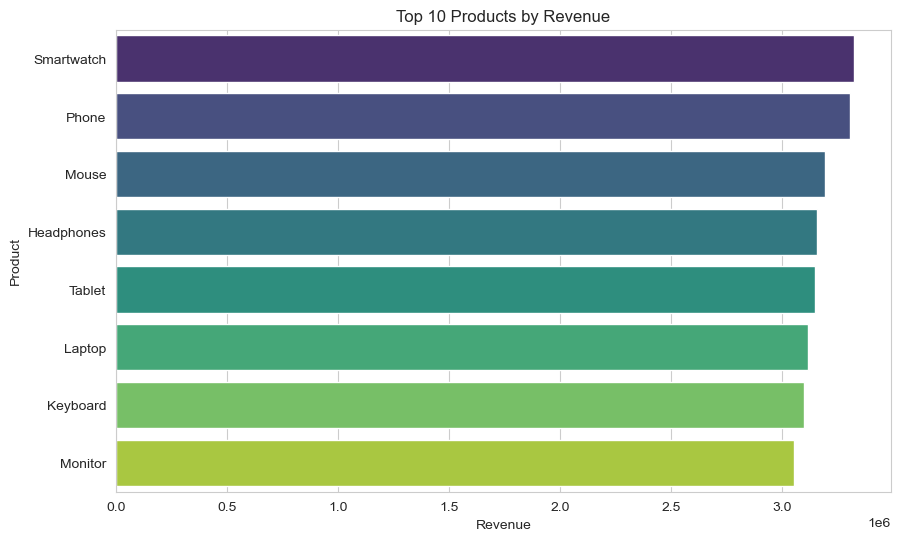

In [19]:
#Top-performing Products
top_products = df.groupby('Product')['Revenue'].sum().nlargest(10).reset_index()

# Plot top products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Revenue', y='Product', hue='Product', palette='viridis', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

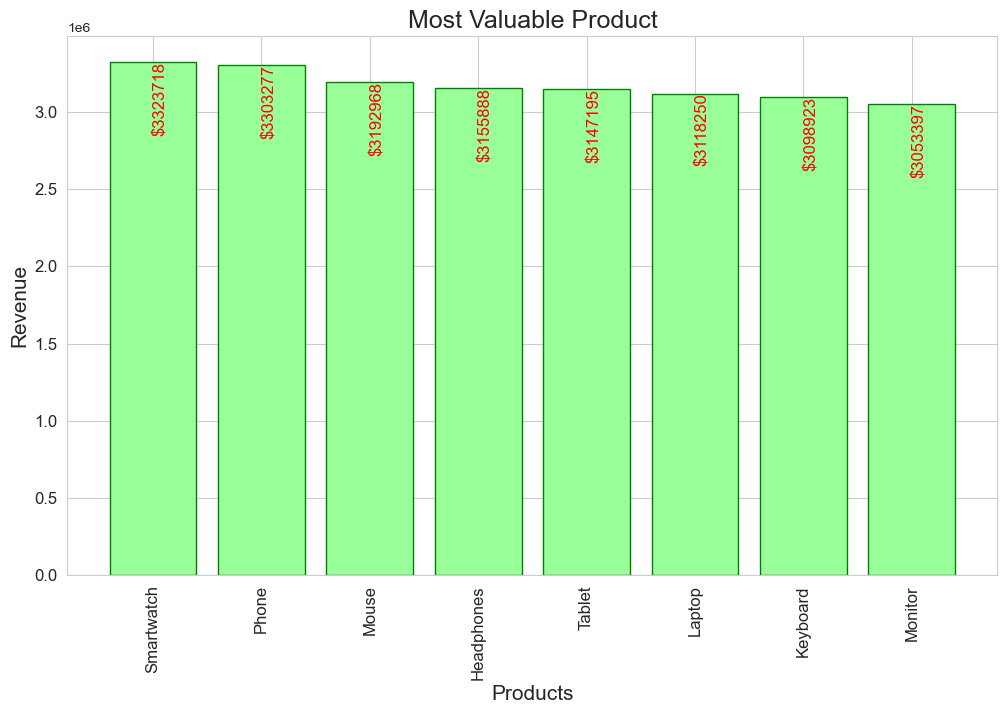

In [30]:
## Most Valuable Product
plt.figure(figsize=(12, 7))
top_product_revenue = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).round(2)

plt.bar(top_product_revenue.index, top_product_revenue, color='#99ff99', edgecolor='green', linewidth=1)
plt.title("Most Valuable Product", fontsize=18)
plt.xlabel("Products", fontsize=15)
plt.ylabel("Revenue", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display revenue values on top of bars
for i, revenue in enumerate(top_product_revenue):
    plt.text(i, revenue, f'${revenue}', fontsize=12, rotation=90, color='red', verticalalignment='top')

plt.show()

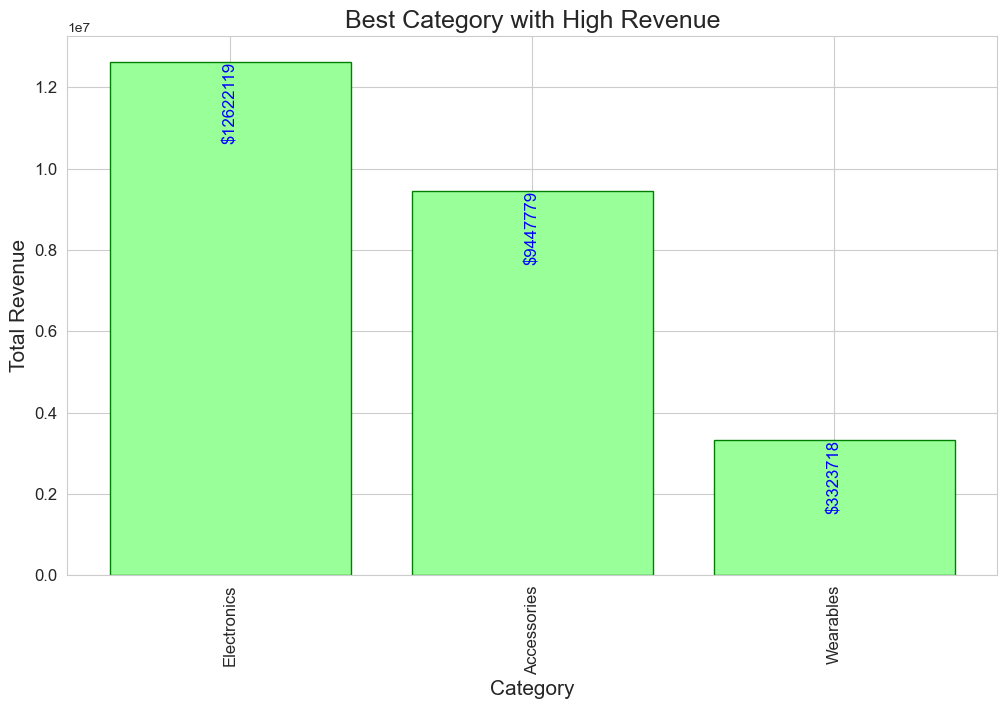

In [29]:
## Top-performing Category
plt.figure(figsize=(12, 7))
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False).round(2)

plt.bar(category_revenue.index.astype(str), category_revenue, color='#99ff99', edgecolor='green', linewidth=1)
plt.title("Best Category with High Revenue", fontsize=18)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Total Revenue", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display revenue values on top of bars
for i, revenue in enumerate(category_revenue):
    plt.text(i, revenue, f'${revenue}', fontsize=12, rotation=90, ha='center', color='blue', verticalalignment='top')

plt.show()

<h3 style="color: green;">3. Customer demographics analysis (age, region, etc.):</h3>

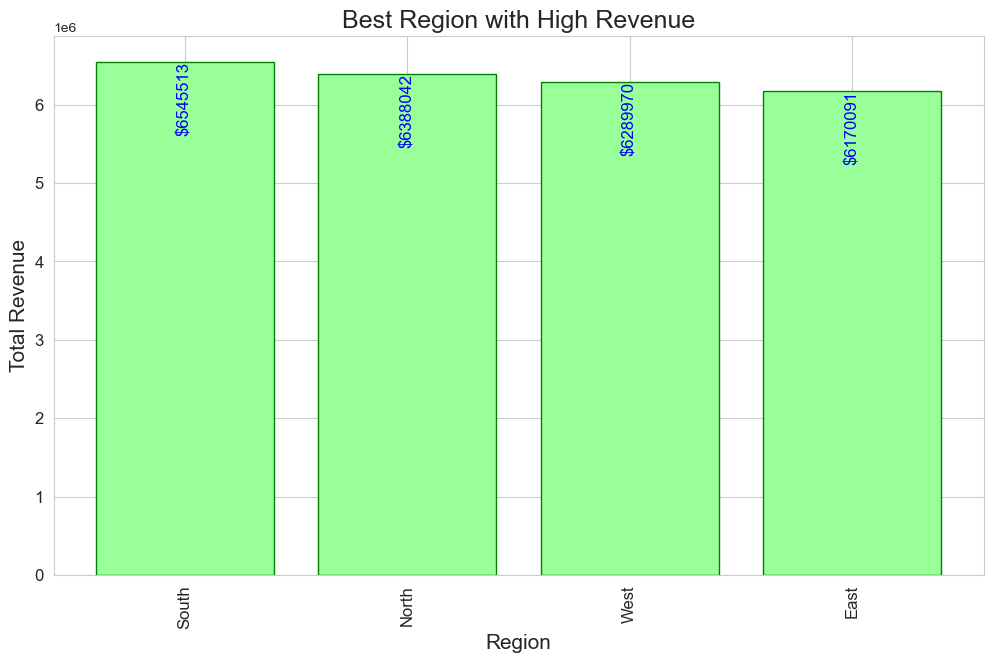

In [28]:
## Top Revenue-Generating Regions
plt.figure(figsize=(12, 7))
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False).round(2)

plt.bar(region_revenue.index.astype(str), region_revenue, color='#99ff99', edgecolor='green', linewidth=1)
plt.title("Best Region with High Revenue", fontsize=18)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Total Revenue", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Display revenue values on top of bars
for i, revenue in enumerate(region_revenue):
    plt.text(i, revenue, f'${revenue}', fontsize=12, rotation=90, ha='center', color='blue', verticalalignment='top')

plt.show()

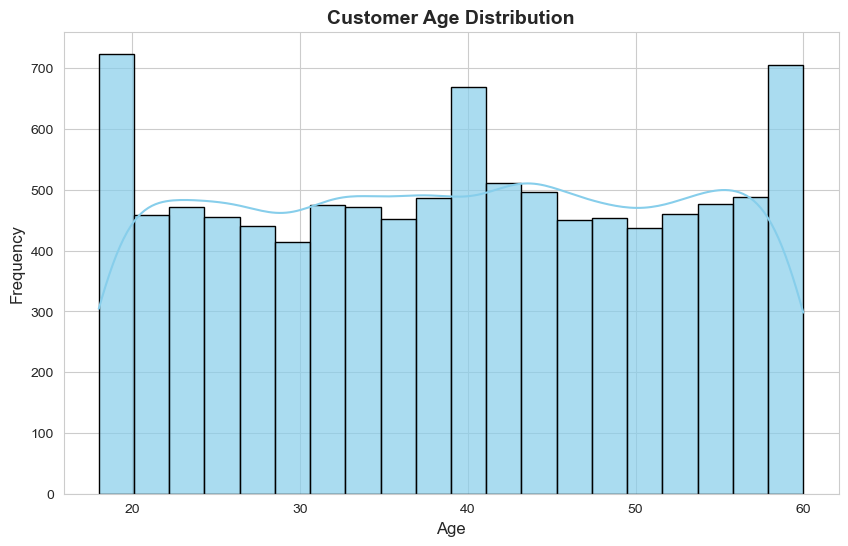

In [23]:
## 4.3 Customer Demographics
# Age distribution
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Clean background
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<h2 style="color: blue;">🚀5. Summary/Report:</h2>


### This notebook contains a detailed exploratory data analysis (EDA) of the provided dataset, focusing on uncovering trends, analyzing product and category performance, and understanding customer demographics. The findings are summarized as follows:

    Revenue trends were stable except for a significant drop in February 2024.
    
    Electronics contributed 50% of total revenue, followed by Accessories (38%) and Wearables (12.5%).

    Top-performing products showed minimal variation in revenue.

    Regional sales were consistent, and the average customer age was 40 years.

    For detailed documentation and actionable recommendations, please refer to the separate PDF document.

## Note

    This documentation will be provided in a separate PDF file for easier reference and sharing.